## Wine dataset
We will be looking at a dataset that consists of wine statistics by wine category.  

(1) Modify the following to see the head of the wine data file.  (You should specify the relative path of the data.)

In [4]:
# ??????????????????????????
#!head wine.data.txt
#import pandas as pd
#from sklearn import datasets
with open("wine.data.txt","r+") as wine:
    #print wine = wine.readlines()    # the reason for using readlines instead of read is because read read a;; the lines together as a whole string
    wine = wine.readlines()
#    print head(wine[1:])
    print wine[0]

#The next 14 lines are the variable names, then the remaining lines are the data in csv



In [1]:
    print wine[1:7]

NameError: name 'wine' is not defined

As you can see, the first several lines are the variable names and the remainder is comma separated lines of numbers.  

(2) Create a file object with open(), and then read in the lines in sequence.  Disregard the first line, read the next 14 in and save the variable names in a list, and save the rest in a list of lists of numbers (each line forms a list by splitting by commas).

In [70]:
with open("wine.data.txt","r+") as wine:
    wine = wine.readlines()
    wine_name = []
    wine_data=[]                     #  1:15 -> 1,...,14
    [wine_name.append(i.strip()) for i in wine[1:15]]  #str.strip([chars]); get rid of "/n" in the string
    [wine_data.append(j.strip())for j in wine[16:]]  # 16
print wine_name 
print wine_data[0:6]

['Wine Class', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline']
['1,13.2,1.78,2.14,11.2,100,2.65,2.76,.26,1.28,4.38,1.05,3.4,1050', '1,13.16,2.36,2.67,18.6,101,2.8,3.24,.3,2.81,5.68,1.03,3.17,1185', '1,14.37,1.95,2.5,16.8,113,3.85,3.49,.24,2.18,7.8,.86,3.45,1480', '1,13.24,2.59,2.87,21,118,2.8,2.69,.39,1.82,4.32,1.04,2.93,735', '1,14.2,1.76,2.45,15.2,112,3.27,3.39,.34,1.97,6.75,1.05,2.85,1450', '1,14.39,1.87,2.45,14.6,96,2.5,2.52,.3,1.98,5.25,1.02,3.58,1290']


(3) Import numpy and save the list of lists as an array object, where the entries are floats.

In [71]:
import numpy as np
print type(wine_data) # data type is string
# transfer to float
wine_data=[x.split(",") for x in wine_data]
wine_data1 = []
for i in range(0,len(wine_data)):
    wine_data1.append(map(float,wine_data[i]))
wine_data = np.array(wine_data1,dtype=np.float)

1,13.16,2.36,2.67,18.6,101,2.8,3.24,.3,2.81,5.68,1.03,3.17,1185
177


In [75]:
np.shape(wine_data)

(177L, 14L)

(4) Print the sample mean and standard deviations of each column (variable).

In [79]:
mean = np.mean(wine_data,axis=0)
print mean
sd = np.std(wine_data,axis=0)
print sd

[  1.94350282e+00   1.29936723e+01   2.33988701e+00   2.36615819e+00
   1.95169492e+01   9.95875706e+01   2.29225989e+00   2.02344633e+00
   3.62316384e-01   1.58694915e+00   5.05480225e+00   9.56983051e-01
   2.60429379e+00   7.45096045e+02]
[  7.71801869e-01   8.06520437e-01   1.11614803e+00   2.74302274e-01
   3.32663379e+00   1.41339221e+01   6.24692901e-01   9.95832553e-01
   1.24300308e-01   5.69927900e-01   2.31787089e+00   2.28486854e-01
   7.03108259e-01   3.13993283e+02]


(5) Normalize the data matrix by subtracting each column mean and divide by the column standard deviation for each column.

In [91]:
wine_data_nor = np.empty([177,14],dtype=float) # create an empty array
for i in range(0,14):
    wine_data_nor[:,i] = (wine_data[:,i]-mean[i])/sd[i] #forget to put i in mean and sd
print wine_data_nor[0:2,:]

[[-1.22246766  0.2558245  -0.50162433 -0.8244853  -2.50010962  0.02918011
   0.57266556  0.73963607 -0.82313862 -0.53857541 -0.29113022  0.40709978
   1.13169801  0.97105248]
 [-1.22246766  0.20622873  0.01802001  1.10768971 -0.27563874  0.09993188
   0.81278355  1.22164481 -0.50133733  2.14597469  0.26972932  0.3195674
   0.80457911  1.40099798]]


(6) Save the number of rows of the matrix as n.

In [92]:
n = np.shape(wine_data_nor)[0]
print n

(7) The correlation matrix of a normalized matrix X can be computed as $$\frac{1}{n-1}X^\top X$$  Compute this. 

In [104]:
wine_data_cor = np.empty([177,14],dtype=np.float64) # create an empty array
# matrice multiply X%*%y: X.dot(y)  transpose of X: X.T
wine_data_cor = wine_data_nor.T.dot(wine_data_nor)/(n-1)  
print wine_data_cor

[[ 1.00568182 -0.32306276  0.4386054  -0.04853454  0.51688345 -0.20007397
  -0.72201196 -0.85129486  0.4899829  -0.4976985   0.27008808 -0.62119955
  -0.79089603 -0.6348137 ]
 [-0.32306276  1.00568182  0.10053095  0.21216306 -0.30507344  0.26021246
   0.28615975  0.23144084 -0.15230593  0.12828549  0.5509959  -0.07580325
   0.05774296  0.64471003]
 [ 0.4386054   0.10053095  1.00568182  0.16589228  0.28777352 -0.04932772
  -0.33540671 -0.41164981  0.2931568  -0.21921348  0.25147381 -0.56404063
  -0.36880324 -0.19058844]
 [-0.04853454  0.21216306  0.16589228  1.00568182  0.44923581  0.2887384
   0.12890384  0.11473173  0.18841851  0.00812754  0.26011245 -0.07560818
   0.00151189  0.22424625]
 [ 0.51688345 -0.30507344  0.28777352  0.44923581  1.00568182 -0.07211429
  -0.31938703 -0.34889322  0.36143713 -0.19186273  0.02059459 -0.27426812
  -0.26970941 -0.43933996]
 [-0.20007397  0.26021246 -0.04932772  0.2887384  -0.07211429  1.00568182
   0.20938338  0.18816443 -0.25352343  0.2277909   0

(8) Use the following code to print an image that corresponds to the correlation matrix.

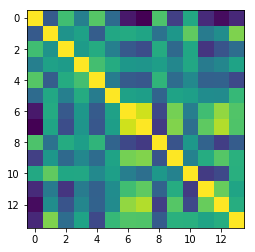

In [106]:
from matplotlib import pyplot as plt
plt.imshow(wine_data_cor)  #heatmap
plt.show()

The following computes F-scores for individual ANOVAs for each variable by class.  If you get finished early try to figure out what's going on.

In [ ]:
N = np.array([(X[:,0] == i+1).sum() for i in range(3)])
V = np.array([X[X[:,0] == i+1,1:].var(axis=0) for i in range(3)])
M = np.array([X[X[:,0] == i+1,1:].mean(axis=0) for i in range(3)])
Bvar = (((M - X[:,1:].mean(axis=0))**2.).T * N).sum(axis=1) / 2
Wvar = (V.T * (N-1)).sum(axis=1) / (n - 3)
F = Bvar / Wvar

In [ ]:
print F